In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
#Loading Dataset
col_names = ['pregant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
df = pd.read_csv('C:/Users/prathyusha/OneDrive/Documents/Datasets/pima-indians-diabetes.csv',header=None,names=col_names)
df

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/prathyusha/OneDrive/Documents/Datasets/pima-indians-diabetes.csv'

BASIC EDA

In [ ]:
df.head()

In [ ]:
df.tail()

In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregant   768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,pregant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isnull().sum()

pregant     0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

FEATURE SELECTION

In [1]:
#split dataset in features and target variable
feature_cols = ['pregant','insulin','bmi','age','glucose','bp','pedigree']
X = df.drop(['Outcome'],axis='columns') #Features
y = df.label #Target variable

NameError: name 'df' is not defined

Splitting Data

In [10]:
#Split dataset into training set and test set
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1) #70% training and 30% test

Building Decision Tree Model

In [11]:
#Create Decision Tree Classifier Object
clf = DecisionTreeClassifier()

#Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Evaluating the Model

In [12]:
#Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.658008658008658


We got the classification of 68% which is considered as good accuracy. We can improve this accuracy
by tuning the parameters in the Decision Tree Algorithm

Visualizing Decision Tree

In [13]:
!pip install pydotplus

In [14]:
!pip install graphviz 

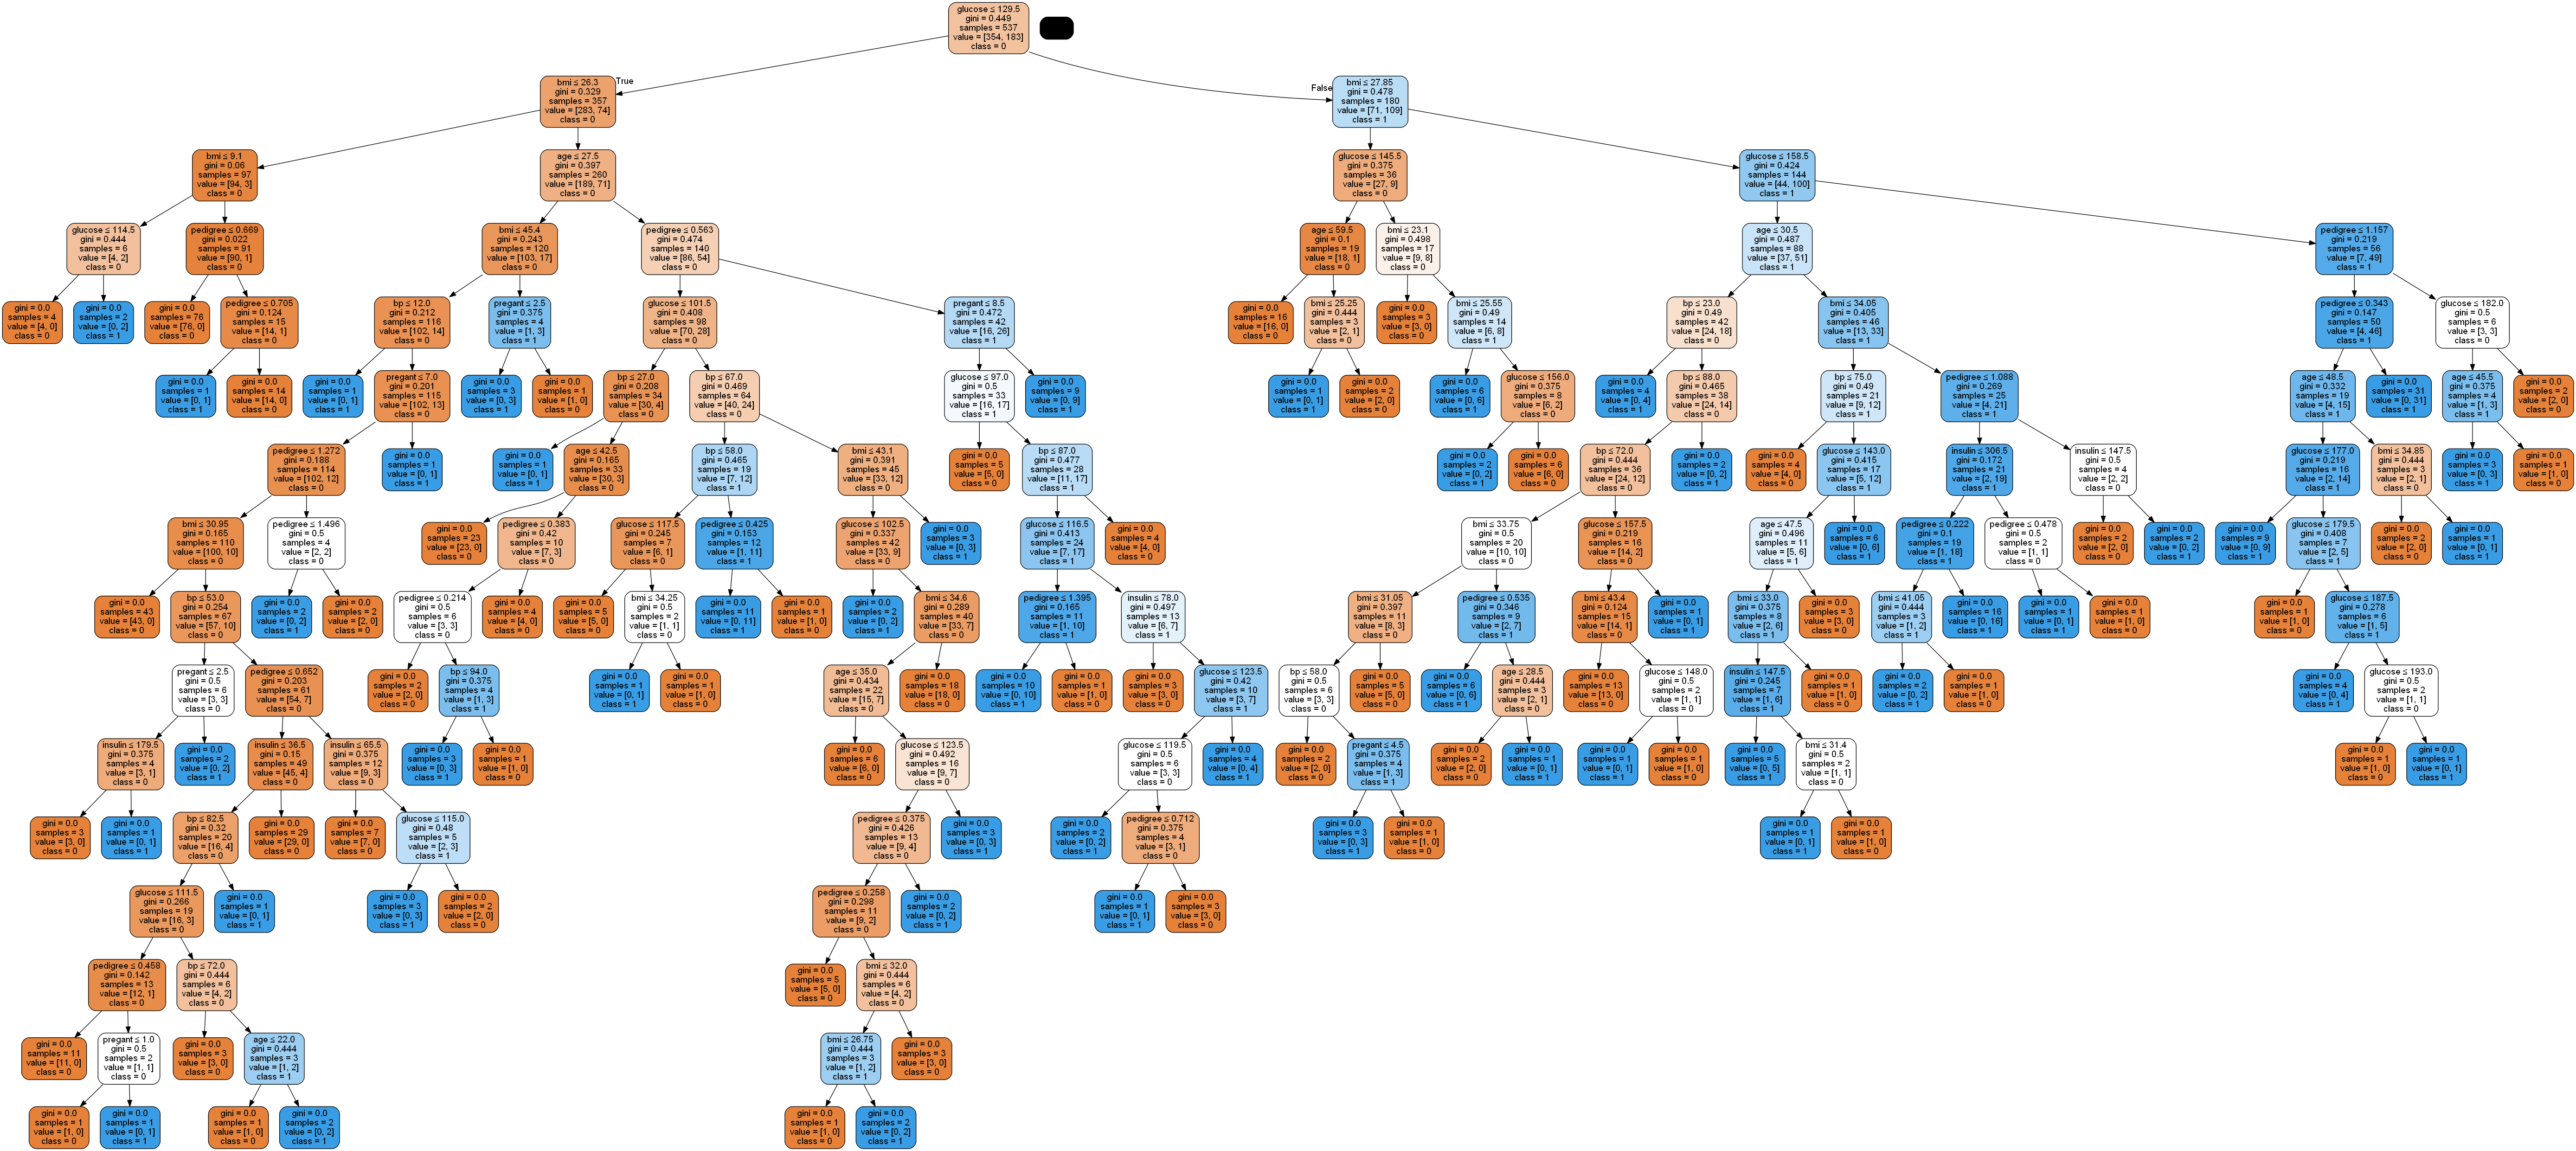

In [16]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus


dot_data = StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,
               special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

Optimizing Decision Tree Performance


In [18]:
#Create Decision Tree Classifier Object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)
#Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7705627705627706


The Classification rate is increased to 77% which is better accuracy tha tthe 
previous model

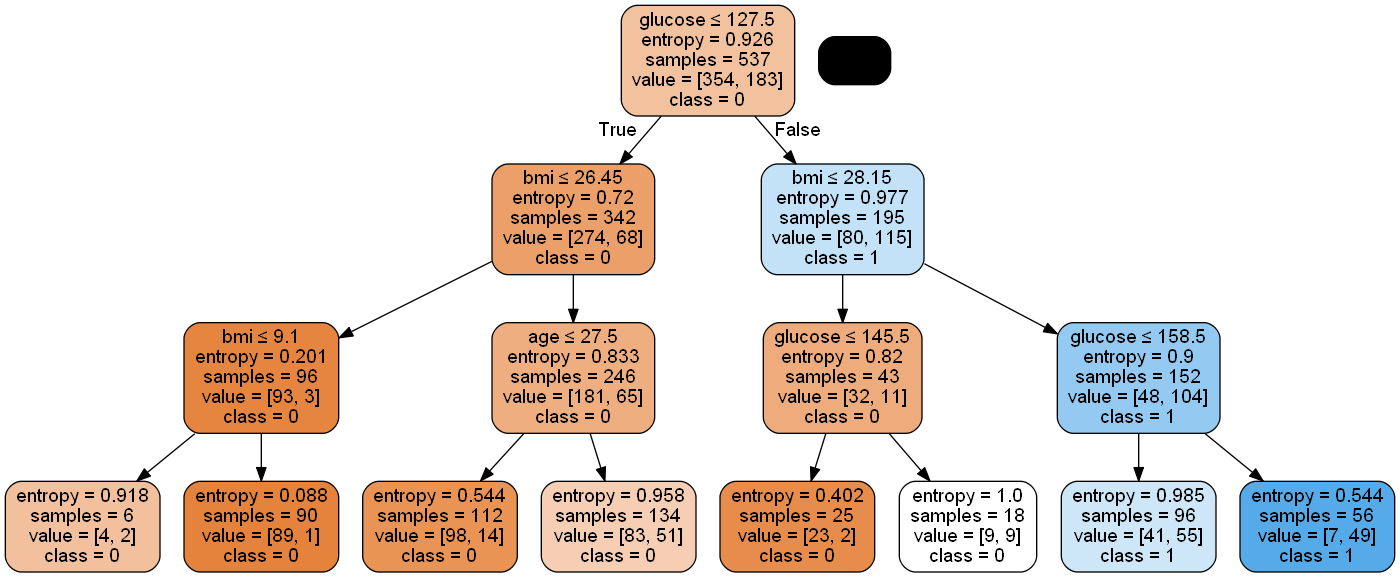

In [24]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())
